# PPGCOMP - FURG | 23148P - Data Visualization and Exploratory Data Analysis | 02/2024 
This notebook contains the solution for Task 08 of the course 23148P - Data Visualization and Exploratory Data Analysis - 02/2024 of the Graduate Program in Computing at FURG (PPGCOMP-FURG).

**Professor:** Dr. Adriano Velasque Werhli.

**Student:** Vitor Avelaneda.

* **Contact:** avelaneda.vitor@gmail.com

The repository with the notebooks can be accessed [here!](https://github.com/vitoravelaneda/23148P-Data_Visualization_and_Exploratory_Data_Analysis-PPGCOMP-FURG)

## Task:

Using the data set produce a graph, or more, showing some interesting relationship among the variables. Explore the data set and produce graphs that need a minimum of verbal explanation. You'll present the graph. 

## Solution

**Verify the installation of necessary packages.**

In [1]:
if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
if (!requireNamespace("tidyr", quietly = TRUE)) install.packages("tidyr")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")

**Load necessary packages.**

In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)


Anexando pacote: ‘dplyr’


Os seguintes objetos são mascarados por ‘package:stats’:

    filter, lag


Os seguintes objetos são mascarados por ‘package:base’:

    intersect, setdiff, setequal, union




**Read the CSV file**

In [3]:
covid_data <- read.csv("./owid-covid-data.csv")
head(covid_data)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,Asia,Afghanistan,2020-01-03,NA,0,NA,NA,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
2,AFG,Asia,Afghanistan,2020-01-04,NA,0,NA,NA,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
3,AFG,Asia,Afghanistan,2020-01-05,NA,0,NA,NA,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
4,AFG,Asia,Afghanistan,2020-01-06,NA,0,NA,NA,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
5,AFG,Asia,Afghanistan,2020-01-07,NA,0,NA,NA,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
6,AFG,Asia,Afghanistan,2020-01-08,NA,0,0,NA,0,0,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA


**Filter data for time series (BRA and ARG)**

In [4]:
time_series_data <- covid_data %>%
  filter(iso_code %in% c("BRA", "ARG")) %>%
  mutate(
    total_vaccinations_per_million = total_vaccinations / 1e6
  ) %>%
  select(
    iso_code, date, new_cases_per_million, stringency_index,
    total_cases_per_million, total_deaths_per_million, total_vaccinations_per_million
  ) %>%
  mutate(date = as.Date(date)) %>%
  na.omit()

**Transform data to long format for the plot**

In [5]:
time_series_long <- time_series_data %>%
  pivot_longer(
    cols = c(
      new_cases_per_million, stringency_index, 
      total_cases_per_million, total_deaths_per_million, total_vaccinations_per_million
    ),
    names_to = "variable",
    values_to = "value"
  )


**Plot time series**

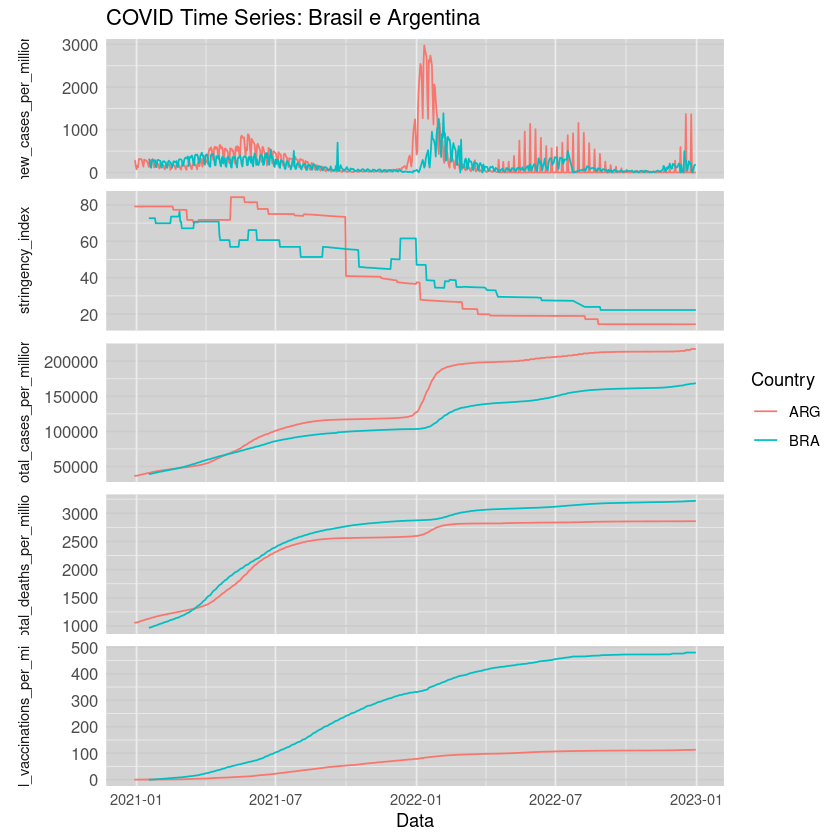

In [6]:
p <- ggplot(time_series_long, aes(x = date, y = value, color = iso_code)) +
  geom_line() +
  facet_grid(variable ~ ., scales = "free_y", switch = "y") +  
  labs(
    title = "COVID Time Series: Brasil e Argentina",
    x = "Data",
    y = NULL,  
    color = "Country"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",  
    strip.placement = "outside",  
    strip.text.y = element_text(angle = 0),  
    panel.spacing = unit(0.5, "lines"),  
    axis.text.y = element_text(size = 10),  
    panel.grid.major.y = element_line(color = "gray80"),  
    panel.background = element_rect(fill = "lightgray", color = NA),  
    plot.background = element_rect(fill = "white", color = NA)  
  )

p

**Save the plot as PDF with adjusted dimensions**

In [7]:
ggsave("serie_temporal.pdf", plot = p, width = 10, height = 10)